# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Conservation of energy is applied to the surface of the pipe. There is no energy generation in that control volume. 

The control volume is the external surface of the pipe of surface area $A=\pi D\times L=2.5m^2$. The steam loses heat to the outside at a rate $q=18.405kW$. This energy is transferred to the outside through radiation and convection. The conservation of energy applied to the surface of the pipe therefore reduces to:

$$
\dot{E}_{in}-\dot{E}_{out}=0
$$

with $\dot{E}_{in}=q$ and $\dot{E}_{out}=q_{conv}+q_{rad}$. For a surface temperature $T_s$, this equation becomes

$$
q-hA(T_s-T_\infty)-\sigma\varepsilon A(T_s^4-T_\infty^4)=0
$$

that we solve for $T_s$ using the function root finder solver fsolve from scipy.optimize.

The annual energy loss $E_{loss}$ is q multiplied by a year. The energy consumed by the boiler to create the total energy loss is
$$
E_{furnace}=\frac{E_{loss}}{\eta_f}
$$

Warning: the cost is in dollars per MEGAJoule.

The equation for heat flux is:

$$
q = \frac{1}{R}\Delta T
$$

and R is defined mathematically with:

$$
R = \frac{ln (\frac{r_o}{r_i})}{2 \pi k L}
$$

Using fiberglass insulation, k = 0.051 $W/mC$ when T = 150 C, and L = 25 $m$. 

Solving for the ratio of outer radius to inner radius,

$$
\frac{r_o}{r_i} = e^{2R\pi k L}
$$

In [2]:
## Work from HTpy-HW2, problemn 3

from Libraries import thermodynamics as thermo
import numpy as np
import scipy.constants as csts
from scipy.optimize import fsolve
D = 0.1
L = 25.
h = 10.
q = 18405.
T_infty = 25.
eps = 0.8
eta_f = 0.9
Cost = 0.02
A = np.pi*D*L

def heatfunc(Ts):
    global q,h,A,T_infty,eps
    return q-h*A*(Ts-T_infty)-eps*csts.sigma*A*(thermo.C2K(Ts)**4-thermo.C2K(T_infty)**4)
root = fsolve(func=heatfunc,x0=[100.])
T_s = root[0]


print('The steam line surface temperature is %.0f C' %T_s)
print('verification:',A*h*(T_s-T_infty) + eps*csts.sigma*A*(thermo.C2K(T_s)**4-thermo.C2K(T_infty)**4))
cost = q*(365*24*3600)/0.9*Cost*1e-6
print('The cost of operation for a year is $%.f' %cost)

The steam line surface temperature is 150 C
verification: 18404.999999999996
The cost of operation for a year is $12898


The thickness of the insulation in case 1 is 0.010 m
The cost for case 1 is $7363
The thickness of the insulation in case 2 is 0.020 m
The cost for case 2 is $3849
The thickness of the insulation in case 3 is 0.030 m
The cost for case 2 is $2920


Text(0, 0.5, 'Cost (Dollars)')

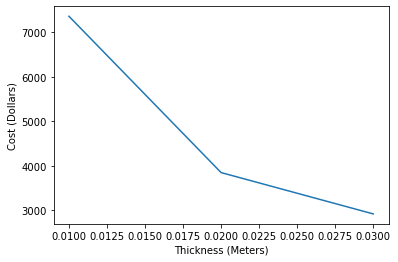

In [3]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts
from scipy.optimize import fsolve

k = 0.051
L = 25
T_s = 150
T_infty = 25
r_i = 0.1

#For case 1:
r_o1 = 0.11

t_1 = r_o1 - r_i
R_1 = (np.log(r_o1/r_i))/(2*3.14159*0.051*25)
q_1 = (T_s-T_infty)/R_1

cost1 = q_1*(365*24*3600)/0.9*Cost*1e-6

print('The thickness of the insulation in case 1 is %.3f m' %t_1)
print('The cost for case 1 is $%.f' %cost1)

#For case 2:
r_o2 = 0.12

t_2 = r_o2 - r_i
R_2 = (np.log(r_o2/r_i))/(2*3.14159*0.051*25)
q_2 = (T_s-T_infty)/R_2

cost2 = q_2*(365*24*3600)/0.9*Cost*1e-6

print('The thickness of the insulation in case 2 is %.3f m' %t_2)
print('The cost for case 2 is $%.f' %cost2)

#For case 3:
r_o3 = 0.13

t_3 = r_o3 - r_i
R_3 = r_o3 - r_i
q_3 = (T_s-T_infty)/R_3

cost3 = q_3*(365*24*3600)/0.9*Cost*1e-6

print('The thickness of the insulation in case 3 is %.3f m' %t_3)
print('The cost for case 2 is $%.f' %cost3)

thickness = [0.010, 0.020, 0.030]
cost = [7363,3849,2920]
plt.plot(thickness,cost)
plt.xlabel('Thickness (Meters)')
plt.ylabel('Cost (Dollars)')

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
    <li>Effects of radiation are not considered</li>
    <li>Air trapped between panes is stagnant</li>

</ul>
$$
q''_{cond}= \frac{1}{R''_{cond}}(T_{inside}-T_{outside})
$$

$$
R''_{cond}=\frac{t}{k}
$$



In [4]:
Ti=294
To=263
t=0.0024
k=0.96
R=t/k
print('The value of R''_{cond} is',R,'{k*m^2}/{watts}')
q=(1/R)*(Ti-To)
print('The amount of conductive heat transfer for a single pane window is',q, '{watts}/{m^2}')

The value of R_{cond} is 0.0025 {k*m^2}/{watts}
The amount of conductive heat transfer for a single pane window is 12400.0 {watts}/{m^2}


In [5]:
Ti=294
To=263
t=0.0024+0.003175
k=0.96
R=t/k
print('The value of R''_{cond} is',R,'{k*m^2}/{watts}')
q=(1/R)*(Ti-To)
print('The amount of conductive heat transfer for a single pane window is',q, '{watts}/{m^2}')

The value of R_{cond} is 0.005807291666666667 {k*m^2}/{watts}
The amount of conductive heat transfer for a single pane window is 5338.11659192825 {watts}/{m^2}


In [6]:
Ti = 294
To = 263
k = 0.96
kair= 1.4
tglass= 0.004
tspace= 0.005
Rglass = (tglass)/(k)
Rair = (tspace)/(kair)
R = Rglass+Rair
q = (1/R)*(Ti-To)
print('The thickness of each pane is 2mm and the space between is 5mm.')
print('The amount of conductive heat transfer for a double pane window is', q, '{watts/{m^2}}')

The thickness of each pane is 2mm and the space between is 5mm.
The amount of conductive heat transfer for a double pane window is 4006.153846153846 {watts/{m^2}}
